In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [40]:
df = pd.read_csv('/content/diabetes_prediction_dataset[1].csv')
df.shape

(100000, 9)

In [41]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [42]:
df.diabetes.value_counts()

,count
diabetes,
0,91500
1,8500


In [43]:
df_0 = df[df.diabetes == 0]
df_1 = df[df.diabetes == 1]

In [44]:
diab = pd.concat([df_0.iloc[:8500,:],df_1])
diab.shape

(17000, 9)

In [45]:
diab.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [46]:
diab.diabetes.value_counts()

,count
diabetes,
0,8500
1,8500


In [47]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 0 to 99979
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               17000 non-null  object 
 1   age                  17000 non-null  float64
 2   hypertension         17000 non-null  int64  
 3   heart_disease        17000 non-null  int64  
 4   smoking_history      17000 non-null  object 
 5   bmi                  17000 non-null  float64
 6   HbA1c_level          17000 non-null  float64
 7   blood_glucose_level  17000 non-null  int64  
 8   diabetes             17000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.3+ MB


In [48]:
diab.replace('?',np.nan,inplace = True)
diab.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [49]:
diab.gender.unique()

array(['Female', 'Male'], dtype=object)

In [50]:
diab.smoking_history.unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [51]:
diab.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,50.682718,0.153059,0.088353,29.458055,6.158206,163.358176,0.500000
std,21.455697,0.360055,0.283816,7.394531,1.287353,57.095427,0.500015
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,36.000000,0.000000,0.000000,25.800000,5.700000,130.000000,0.000000
50%,54.000000,0.000000,0.000000,27.320000,6.100000,155.000000,0.500000
75%,67.000000,0.000000,0.000000,32.842500,6.600000,200.000000,1.000000
max,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


<Axes: ylabel='Density'>

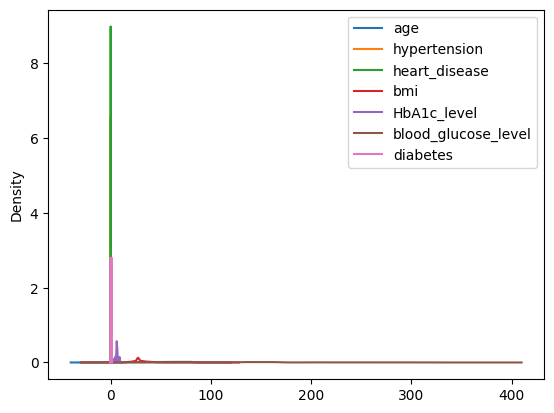

In [52]:
diab.plot.kde()

<Axes: xlabel='diabetes', ylabel='age'>

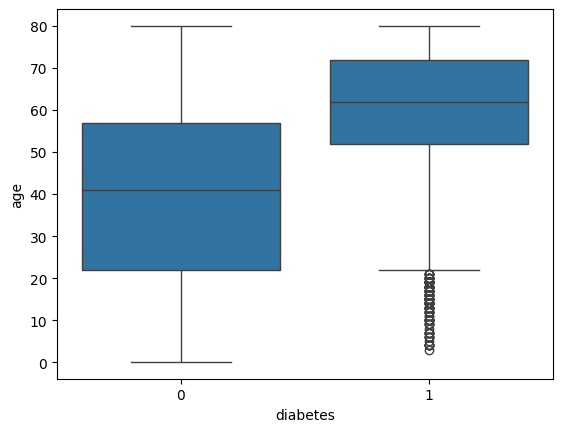

In [53]:
sns.boxplot(diab,x = 'diabetes',y = 'age')

In [54]:
X = diab.drop('diabetes',axis = 1)
y = diab['diabetes']

In [55]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size = 0.20, random_state = 42)
Xtrain.shape, Xtest.shape

((13600, 8), (3400, 8))

In [56]:
lb = LabelEncoder()
Xtrain['gender'] = lb.fit_transform(Xtrain['gender'])
Xtest['gender'] = lb.transform(Xtest['gender'])

Xtrain['smoking_history'] = lb.fit_transform(Xtrain['smoking_history'])
Xtest['smoking_history'] = lb.transform(Xtest['smoking_history'])

In [57]:
Xtrain.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
5122,0,21.0,0,0,0,23.63,4.0,90
2763,1,56.0,0,0,4,27.20,4.0,140
1079,0,23.0,0,0,1,24.37,6.0,140
1451,0,46.0,0,0,4,48.57,5.8,159
5068,1,45.0,0,0,0,31.20,4.8,140


In [58]:
ss = StandardScaler()
Xtrain = ss.fit_transform(Xtrain)
Xtest = ss.transform(Xtest)

In [59]:
train_data = torch.tensor(Xtrain, dtype = torch.float32)
train_label = torch.tensor(ytrain.values, dtype = torch.long)

test_data = torch.tensor(Xtest, dtype = torch.float32)
test_label = torch.tensor(ytest.values, dtype = torch.long)

In [60]:
input_size = train_data.shape[1]
hidden_size = 500
output_size = 1
epochs = 200

In [61]:
class NeuralNetwork(nn.Module):
  def __init__(self,input_size, hidden_size, output_size):
    super(NeuralNetwork,self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu1 = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,hidden_size)
    self.relu2 = nn.ReLU()
    self.l3 = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu1(out)
    out = self.l2(out)
    out = self.relu2(out)
    out = self.l3(out)

    return out

Epoch: 0, Loss:0.695
Epoch: 10, Loss:0.258
Epoch: 20, Loss:0.253
Epoch: 30, Loss:0.239
Epoch: 40, Loss:0.227
Epoch: 50, Loss:0.209
Epoch: 60, Loss:0.188
Epoch: 70, Loss:0.177
Epoch: 80, Loss:0.170
Epoch: 90, Loss:0.165
Epoch: 100, Loss:0.161
Epoch: 110, Loss:0.157
Epoch: 120, Loss:0.153
Epoch: 130, Loss:0.151
Epoch: 140, Loss:0.151
Epoch: 150, Loss:0.144
Epoch: 160, Loss:0.142
Epoch: 170, Loss:0.138
Epoch: 180, Loss:0.143
Epoch: 190, Loss:0.138


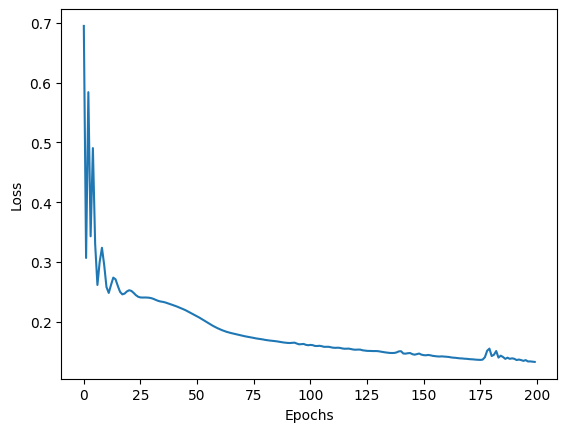

In [62]:
model = NeuralNetwork(input_size,hidden_size,output_size)
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

#training
losses = []
for epoch in range(epochs):
  #forward pass and loss calculation
  y_pred = model(train_data)
  loss = criterion(y_pred.squeeze(),train_label.float())

  losses.append(loss.item())

  #backward pass and optimization
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()

  if(epoch)%10==0:
    print(f'Epoch: {epoch}, Loss:{loss.item():.3f}')


#plotting the loss curve
plt.plot(range(epochs),losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [63]:
# Prediction on test data
# Computing gradients is not needed
with torch.no_grad():
    y_test_pred = model(test_data)                # Get model output (logits)
    pred_probs = torch.sigmoid(y_test_pred)      # Apply sigmoid to get probabilities

    # Vectorized way to convert probabilities to binary labels (0 or 1)
    pred_label = (pred_probs > 0.5).float()       # This creates a tensor of 0s and 1s

    # Count correct predictions
    correct_pred = (pred_label.view(-1) == test_label.view(-1)).sum().item()
    # print(correct_pred)
    # print(test_label.shape)

    # Calculate accuracy
    accuracy = correct_pred / test_label.shape[0]           # Calculate accuracy
    print(f'Accuracy: {accuracy:.4f}')                      # Print accuracy


Accuracy: 0.8924
